In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
#from pandas_profiling import ProfileReport
import cassandra
#print(cassandra.__version__) 

In [2]:
df= pd.read_excel("Data_Train.xlsx")
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
print(df[df["Total_Stops"].isnull()])
print(df[df["Route"].isnull()])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  
        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [5]:
cat_vars=[i for i in df.columns if df[i].dtypes=='object']
cat_vars
_req=['Airline','Source','Destination','Total_Stops']

In [6]:
air_lines=[i for i in df.Airline.unique()]
air_lines
df['Airline'].value_counts()#sort_index()

#df.Airline.unique()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
g=df.groupby("Airline")
g.get_group('Jet Airways Business')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [8]:
df[df['Route']=='Nan']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [9]:
df.dropna(inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [11]:
df['Destination'].replace({'New Delhi':'Delhi'},inplace=True)
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [12]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [14]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
sot=df.groupby('Source')

In [16]:
sot.get_group('Chennai')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
29,Vistara,15/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
30,Vistara,18/06/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
47,Air India,3/05/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
57,Vistara,6/03/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,7414
...,...,...,...,...,...,...,...,...,...,...,...
10446,IndiGo,9/06/2019,Chennai,Kolkata,MAA → CCU,11:35,14:00,2h 25m,non-stop,No info,3858
10469,SpiceJet,27/05/2019,Chennai,Kolkata,MAA → CCU,09:45,12:00,2h 15m,non-stop,No info,3597
10489,IndiGo,15/03/2019,Chennai,Kolkata,MAA → CCU,22:05,00:30 13 Mar,2h 25m,non-stop,No info,6297
10610,IndiGo,21/05/2019,Chennai,Kolkata,MAA → CCU,13:15,15:35,2h 20m,non-stop,No info,3597


In [17]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [18]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [19]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
#df['journey_day']=df['Date_of_Journey'].dt.day
#df['journey_month']=df['Date_of_Journey'].dt.month
#df.head(4)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2021-11-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-11 05:50:00,2021-11-11 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-11 18:05:00,2021-11-11 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,2021-11-11 16:50:00,2021-11-11 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-11-11 19:55:00,2021-11-11 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-11-11 20:45:00,2021-11-11 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-11-11 08:20:00,2021-11-11 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,2021-11-11 11:30:00,2021-11-11 14:10:00,2h 40m,non-stop,No info,12648


In [21]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [22]:
y=df['Route'].unique()
y.shape

(128,)

In [23]:
df['day_of_journey']=df['Date_of_Journey'].dt.day
df['month_of_journey']=df['Date_of_Journey'].dt.month
df['dep_hr']=df['Dep_Time'].dt.hour
df['dep_min']=df['Dep_Time'].dt.minute
df.drop('Date_of_Journey',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)


In [24]:
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10682 non-null  int64 
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10682 non-null  object
 7   Price             10682 non-null  int64 
 8   day_of_journey    10682 non-null  int64 
 9   month_of_journey  10682 non-null  int64 
 10  dep_hr            10682 non-null  int64 
 11  dep_min           10682 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


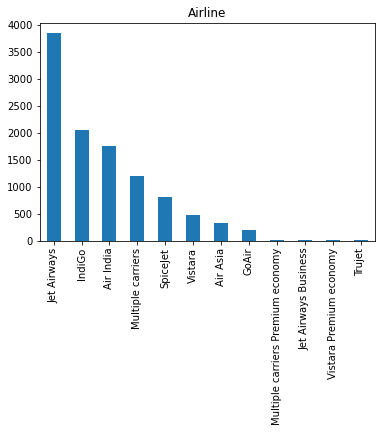

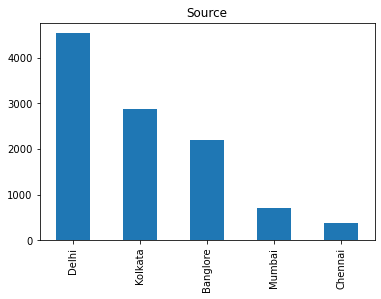

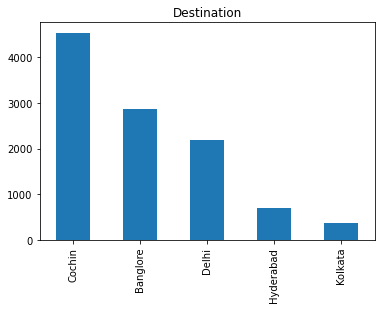

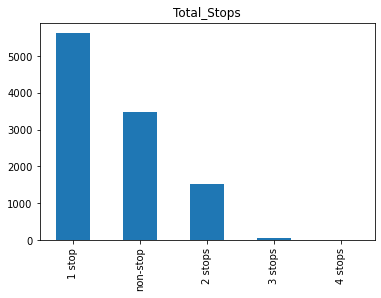

In [26]:
for i in _req:
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()
    

<AxesSubplot:xlabel='Airline'>

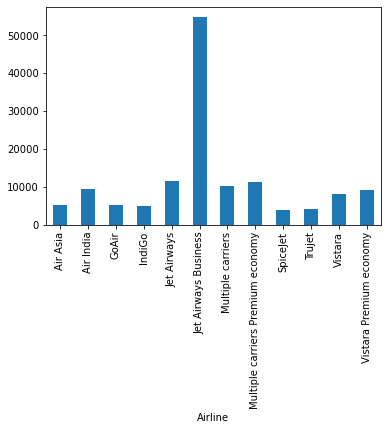

In [27]:
df.groupby("Airline")['Price'].median().plot(kind='bar')

<AxesSubplot:xlabel='Additional_Info'>

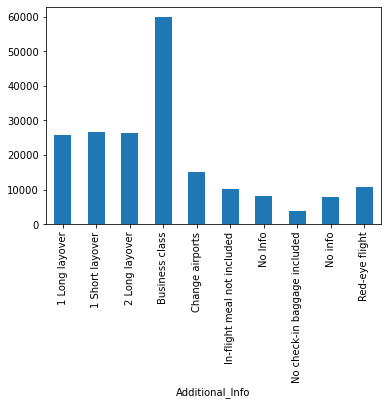

In [28]:
df.groupby('Additional_Info')['Price'].median().plot(kind='bar')

<AxesSubplot:xlabel='Total_Stops'>

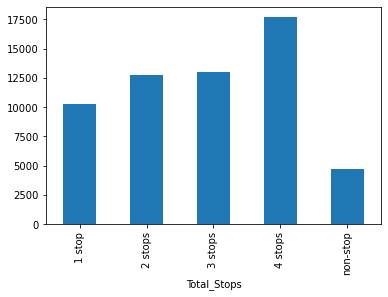

In [29]:
df.groupby('Total_Stops')['Price'].median().plot(kind='bar')

<AxesSubplot:xlabel='Duration', ylabel='Price'>

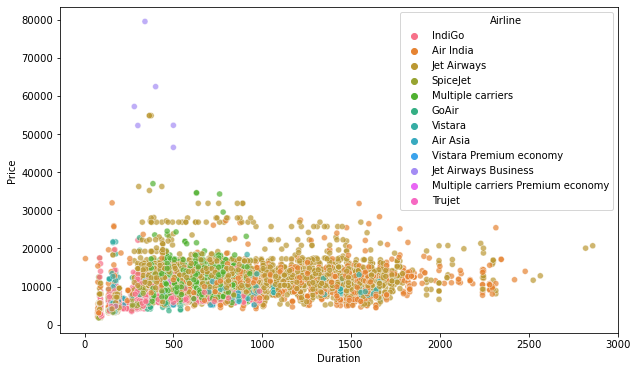

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration',y='Price',data=df,hue='Airline',alpha=0.7,legend='brief')

In [31]:
df['Duration'].unique().shape

(368,)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

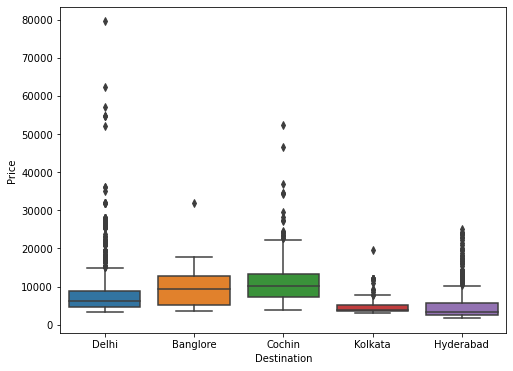

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Destination',y='Price',data=df)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10682.0,643.020502,507.830133,5.0,170.0,520.0,930.0,2860.0
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
day_of_journey,10682.0,12.682925,8.803800,3.0,5.0,6.0,21.0,27.0
month_of_journey,10682.0,5.534731,2.987626,1.0,3.0,5.0,6.0,12.0
dep_hr,10682.0,12.491013,5.748820,0.0,8.0,11.0,18.0,23.0
dep_min,10682.0,24.409287,18.767801,0.0,5.0,25.0,40.0,55.0


In [34]:
df[df['Duration']==5.0]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,dep_hr,dep_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5,2 stops,No info,17327,3,6,16,50


In [35]:
df.drop(index=6474,axis=0,inplace=True)

In [36]:
df.shape
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
df['Total_Stops'].replace({'non-stop' :0, '2 stops' :2, '1 stop' : 1, '3 stops' : 3, '4 stops':4},inplace=True)

In [38]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,dep_hr,dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,5,12,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No info,13302,3,1,16,50


In [39]:
df_copy=df.copy()
object_df = df_copy.select_dtypes(include='object')
numeric_df= df_copy.select_dtypes(exclude='object')

In [40]:
numeric_df.head()

,Duration,Total_Stops,Price,day_of_journey,month_of_journey,dep_hr,dep_min
0,170,0,3897,24,3,22,20
1,445,2,7662,5,1,5,50
2,1140,2,13882,6,9,9,25
3,325,1,6218,5,12,18,5
4,285,1,13302,3,1,16,50


In [41]:
object_df.head()

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,No info


In [42]:
label_enco = LabelEncoder() 

In [43]:
object_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [44]:
object_df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [45]:
object_df['Source']=label_enco.fit_transform(df['Source'])
object_df['Destination']=label_enco.fit_transform(df['Destination'])

<ipython-input-45-538a823af8c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df['Source']=label_enco.fit_transform(df['Source'])
<ipython-input-45-538a823af8c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df['Destination']=label_enco.fit_transform(df['Destination'])


In [46]:
object_df

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,0,2,BLR → DEL,No info
1,Air India,3,0,CCU → IXR → BBI → BLR,No info
2,Jet Airways,2,1,DEL → LKO → BOM → COK,No info
3,IndiGo,3,0,CCU → NAG → BLR,No info
4,IndiGo,0,2,BLR → NAG → DEL,No info
...,...,...,...,...,...
10678,Air Asia,3,0,CCU → BLR,No info
10679,Air India,3,0,CCU → BLR,No info
10680,Jet Airways,0,2,BLR → DEL,No info
10681,Vistara,0,2,BLR → DEL,No info


In [47]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [48]:
airlines_df =pd.get_dummies(object_df['Airline'])

In [49]:
airlines_df.drop("Trujet",axis=1,inplace=True)

In [50]:
airlines_df.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [51]:
object_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [52]:
object_df['Additional_Info'].replace({'No Info':'No info','1 Long layover':'other','1 Short layover' :'other','2 Long layover' :'other','No Info':'other'},inplace=True)

C:\Users\blank.space\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [53]:
object_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'other', 'Change airports',
       'Business class', 'Red-eye flight'], dtype=object)

In [54]:
object_df['Additional_Info'].replace({'No info':'other','No check-in baggage included':'other','Change airports':'other'},inplace=True)

In [55]:
object_df['Additional_Info'].unique()

array(['other', 'In-flight meal not included', 'Business class',
       'Red-eye flight'], dtype=object)

In [56]:
object_df['Additional_Info'].replace({'Red-eye flight':'Red-eye-flight','In-flight meal not included':'meal_not_included'},inplace=True)

In [57]:
object_df['Additional_Info'].unique()

array(['other', 'meal_not_included', 'Business class', 'Red-eye-flight'],
      dtype=object)

In [58]:
df1=pd.concat([airlines_df,object_df],axis=1)

In [59]:
df1.drop('Airline',axis=1,inplace=True)

In [60]:
df1.drop('Route',axis=1,inplace=True)

In [61]:
df1['Additional_Info']=label_enco.fit_transform(df1['Additional_Info'])

([0, 3, 2, 1, 4]) == ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']

In [62]:
df1['Destination'].unique()

array([2, 0, 1, 4, 3])

[2, 0, 1, 4, 3] ==['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad']

In [63]:
df1['Additional_Info'].unique()

array([3, 2, 0, 1])

[3, 2, 0, 1] ==  ['other', 'meal_not_included', 'Business class', 'Red-eye-flight']

In [64]:
df1.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source,Destination,Additional_Info
0,0,0,0,1,0,0,0,0,0,0,0,0,2,3
1,0,1,0,0,0,0,0,0,0,0,0,3,0,3
2,0,0,0,0,1,0,0,0,0,0,0,2,1,3
3,0,0,0,1,0,0,0,0,0,0,0,3,0,3
4,0,0,0,1,0,0,0,0,0,0,0,0,2,3


In [65]:
df2=pd.concat([df1,numeric_df],axis=1)

In [66]:
 df2.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,...,Source,Destination,Additional_Info,Duration,Total_Stops,Price,day_of_journey,month_of_journey,dep_hr,dep_min
0,0,0,0,1,0,0,0,0,0,0,...,0,2,3,170,0,3897,24,3,22,20
1,0,1,0,0,0,0,0,0,0,0,...,3,0,3,445,2,7662,5,1,5,50
2,0,0,0,0,1,0,0,0,0,0,...,2,1,3,1140,2,13882,6,9,9,25
3,0,0,0,1,0,0,0,0,0,0,...,3,0,3,325,1,6218,5,12,18,5
4,0,0,0,1,0,0,0,0,0,0,...,0,2,3,285,1,13302,3,1,16,50


In [67]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Air Asia,10681.0,0.029866,0.170226,0.0,0.0,0.0,0.0,1.0
Air India,10681.0,0.163842,0.370150,0.0,0.0,0.0,0.0,1.0
GoAir,10681.0,0.018163,0.133547,0.0,0.0,0.0,0.0,1.0
IndiGo,10681.0,0.192210,0.394056,0.0,0.0,0.0,0.0,1.0
Jet Airways,10681.0,0.360360,0.480127,0.0,0.0,0.0,1.0,1.0
Jet Airways Business,10681.0,0.000562,0.023696,0.0,0.0,0.0,0.0,1.0
Multiple carriers,10681.0,0.111975,0.315350,0.0,0.0,0.0,0.0,1.0
Multiple carriers Premium economy,10681.0,0.001217,0.034868,0.0,0.0,0.0,0.0,1.0
SpiceJet,10681.0,0.076585,0.265944,0.0,0.0,0.0,0.0,1.0
Vistara,10681.0,0.044846,0.206975,0.0,0.0,0.0,0.0,1.0


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Air Asia                           10681 non-null  uint8
 1   Air India                          10681 non-null  uint8
 2   GoAir                              10681 non-null  uint8
 3   IndiGo                             10681 non-null  uint8
 4   Jet Airways                        10681 non-null  uint8
 5   Jet Airways Business               10681 non-null  uint8
 6   Multiple carriers                  10681 non-null  uint8
 7   Multiple carriers Premium economy  10681 non-null  uint8
 8   SpiceJet                           10681 non-null  uint8
 9   Vistara                            10681 non-null  uint8
 10  Vistara Premium economy            10681 non-null  uint8
 11  Source                             10681 non-null  int32
 12  Destination       

## eliminated Trujet  

In [69]:
x = df2.drop(["Price"],axis=1)
y = df2["Price"]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
#from yellowbrick.regressor import PredictionError
from sklearn.metrics import accuracy_score

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [72]:
def model(model):
    y_pred=model.predict(x_test)
    print('mean abs error',mean_absolute_error(y_2test,y_pred))
    print('root mean square error' ,np.sqrt(mean_squared_error(y_2test,y_pred)))
    print('r2_score is ',r2_score(y_2test,y_pred))
    #print('score',model.score(y_2test,y_pred))
    #print('accuracy',accuracy_score(y_test,y_pred,normalize=False))
   # plt.figure(figsize=(10,6),dpi=100)
    #plt.scatter(x_test,y_test)
    

In [73]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8544, 20) (2137, 20) (8544,) (2137,)


In [74]:
y_2train=y_train.values.reshape(-1,1)
y_2test=y_test.values.reshape(-1,1)

In [75]:
print(y_2test.shape,y_2train.shape)

(2137, 1) (8544, 1)


In [76]:
y_2test

array([[4963],
       [4804],
       [9870],
       ...,
       [5386],
       [6673],
       [2754]], dtype=int64)

In [77]:
y_test.shape

(2137,)

In [78]:
y_2test.shape

(2137, 1)

In [79]:
lr=LinearRegression()
lr.fit(x_train,y_2train)
y_prze=lr.predict(x_test)

In [80]:
lr.score(x_train,y_train)

0.6608311904708948

In [81]:
lr.score(x_test,y_2test)

0.6045139056287552

In [82]:
dt=DecisionTreeRegressor(max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,)
dt.fit(x_train,y_2train)
print(dt.score(x_train,y_2train))
print(dt.score(x_test,y_2test))

0.9936884873009885
0.8085776322609486


In [83]:
rf=RandomForestRegressor(n_estimators=11)
rf.fit(x_train,y_2train)
rf.score(x_train,y_2train)

<ipython-input-83-2e790b94b226>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_2train)


0.978232024242585

In [84]:
rf.score(x_test,y_2test)


0.8571719998416036

In [85]:
y_pre=rf.predict(x_test)
y_pre.shape

(2137,)

In [86]:
model(rf)

mean abs error 733.0525405974985
root mean square error 1766.7126042152343
r2_score is  0.8571719998416036


In [87]:
raf=RandomForestRegressor(n_estimators=11)
raf.fit(x,y) 

RandomForestRegressor(n_estimators=11)

In [88]:
df2.columns

Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source', 'Destination', 'Additional_Info',
       'Duration', 'Total_Stops', 'Price', 'day_of_journey',
       'month_of_journey', 'dep_hr', 'dep_min'],
      dtype='object')

In [89]:
df2.Additional_Info

0        3
1        3
2        3
3        3
4        3
        ..
10678    3
10679    3
10680    3
10681    3
10682    3
Name: Additional_Info, Length: 10681, dtype: int32

In [90]:
df2.columns

Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source', 'Destination', 'Additional_Info',
       'Duration', 'Total_Stops', 'Price', 'day_of_journey',
       'month_of_journey', 'dep_hr', 'dep_min'],
      dtype='object')

In [91]:
df2.drop('Duration',axis=1,inplace=True)

In [92]:
df2.shape

(10681, 20)

In [93]:
xx = df2.drop(["Price"],axis=1)
yy = df2["Price"].values.reshape(-1,1)

In [94]:
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.2)

In [95]:
rff=RandomForestRegressor(n_estimators=15,max_depth=None,
    min_samples_split=3,
    min_samples_leaf=1)
rff.fit(xx_train,yy_train)

<ipython-input-95-5b53b09bf053>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rff.fit(xx_train,yy_train)


RandomForestRegressor(min_samples_split=3, n_estimators=15)

In [96]:
rff.score(xx_train,yy_train)

0.9494364237910229

In [97]:
rff.score(xx_test,yy_test)

0.8791091912897442

In [98]:
print(x.Source.unique())
print(df.Source.unique())

[0 3 2 1 4]
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [99]:
df1['Source'].unique()

array([0, 3, 2, 1, 4])

In [100]:
print(x.Destination.unique())
print(df.Destination.unique())

[2 0 1 4 3]
['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']


In [101]:
print(x.Total_Stops.unique())
print(numeric_df.Total_Stops.unique())

[0 2 1 3 4]
[0 2 1 3 4]


In [102]:
print(x.Additional_Info.unique())
print(object_df['Additional_Info'].unique())

[3 2 0 1]
['other' 'meal_not_included' 'Business class' 'Red-eye-flight']


In [103]:
pd.DataFrame(xx.columns)

,0
0,Air Asia
1,Air India
2,GoAir
3,IndiGo
4,Jet Airways
5,Jet Airways Business
6,Multiple carriers
7,Multiple carriers Premium economy
8,SpiceJet
9,Vistara


In [104]:
xy=np.zeros(len(xx_test.columns))
xy[3]=1
xy[11]=0
xy[12]=2
xy[13]=3
xy[14]=0
xy[15]=24
xy[16]=3
xy[17]=22
xy[18]=20

xy
    


array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        3.,  0., 24.,  3., 22., 20.])

In [105]:
xx_test.columns

Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source', 'Destination', 'Additional_Info',
       'Total_Stops', 'day_of_journey', 'month_of_journey', 'dep_hr',
       'dep_min'],
      dtype='object')

In [106]:
rff.predict([xy])

array([5012.03333333])

In [107]:
def estimated_price(airline,source,destination,additional_info,total_stops,day_of_journey,month_of_journey,dep_hr,dep_min):
    xy=np.zeros(len(xx_test.columns))
    loc_ind=np.where(xx_test.columns==airline)[0][0]
    if loc_ind>=0:
        xy[loc_ind]=1
        
    while source is not None:
        if source=='Banglore':
            xy[11]=0
            break
        elif source=='Kolkata':
            xy[11]=3
            break
        elif source=='Delhi':
            xy[11]=2
            break
        elif source=='Chennai':
            xy[11]=1
            break
        else:
            xy[11]=4
            break
            
            
    while destination is not None:
        if destination=='Banglore':
            xy[12]=0
            break
        elif destination=='Kolkata':
            xy[12]=4
            break
        elif destination=='Delhi':
            xy[12]=2
            break
        elif destination=='Cochi':
            xy[12]=1
            break
        else:
            xy[12]=3
            break
            
    while additional_info is not None:
        if additional_info=='other':
            xy[13]=3
            break
        elif additional_info=='meal_not_included':
            xy[13]=2
            break
        elif additional_info=='Business class':
            xy[13]=0
            break
        else:
            xy[13]=1
            break
   
    xy[14]=total_stops
    xy[15]=day_of_journey
    xy[16]=month_of_journey
    xy[17]=dep_hr
    xy[18]=dep_min  
    
    print([xy])
    print(rff.predict([xy])) 

In [108]:
estimated_price('Jet Airways','Kolkata','Cochi','other',0,20,12,12,20)

[array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,
        3.,  0., 20., 12., 12., 20.])]
[9564.]


In [109]:
xx_train.head() 

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source,Destination,Additional_Info,Total_Stops,day_of_journey,month_of_journey,dep_hr,dep_min
7252,0,0,0,0,1,0,0,0,0,0,0,3,0,2,1,24,5,18,55
8578,0,0,0,1,0,0,0,0,0,0,0,1,4,3,0,15,3,14,40
7076,0,0,0,0,0,0,1,0,0,0,0,2,1,3,1,6,1,10,20
1813,0,0,0,0,1,0,0,0,0,0,0,2,1,3,1,27,5,21,50
9941,0,0,0,0,0,0,0,0,1,0,0,4,3,3,0,24,3,13,10


In [110]:
estimated_price('Multiple carriers','Delhi','Cochin','other',1,21,3,11,40) 

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  3.,
        3.,  1., 21.,  3., 11., 40.])]
[8810.22666667]


In [111]:
yy_train

array([[ 8586],
       [ 6297],
       [ 9526],
       ...,
       [ 8586],
       [14714],
       [ 5683]], dtype=int64)

In [112]:
df2.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source,Destination,Additional_Info,Total_Stops,Price,day_of_journey,month_of_journey,dep_hr,dep_min
0,0,0,0,1,0,0,0,0,0,0,0,0,2,3,0,3897,24,3,22,20
1,0,1,0,0,0,0,0,0,0,0,0,3,0,3,2,7662,5,1,5,50
2,0,0,0,0,1,0,0,0,0,0,0,2,1,3,2,13882,6,9,9,25
3,0,0,0,1,0,0,0,0,0,0,0,3,0,3,1,6218,5,12,18,5
4,0,0,0,1,0,0,0,0,0,0,0,0,2,3,1,13302,3,1,16,50


In [113]:
rrf=RandomForestRegressor(n_estimators=11)
rrf.fit(xx,yy)
rrf.score(xx,yy)

<ipython-input-113-fde95904d0e5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rrf.fit(xx,yy)


0.950509046460069

In [114]:
z=[0,0,0,1,0,0,0,0,0,0,0,0,2,3,0,24,3,22,20]
rrf.predict([z])

array([5365.65757576])

In [115]:
for i in range(14,19):
    print(z[i])

0
24
3
22
20


In [116]:
#df1.to_csv('aaaaa.csv')

In [117]:
df2.Total_Stops.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [118]:
df2.dep_hr.unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3], dtype=int64)

In [119]:
df2.dep_min.unique()

array([20, 50, 25,  5,  0, 55, 45, 40, 10, 15, 35, 30], dtype=int64)

In [120]:
xx_test.shape

(2137, 19)

In [121]:
xx_test

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source,Destination,Additional_Info,Total_Stops,day_of_journey,month_of_journey,dep_hr,dep_min
4984,0,1,0,0,0,0,0,0,0,0,0,3,0,3,1,21,5,12,0
7101,0,0,0,0,0,0,1,0,0,0,0,2,1,3,2,27,5,17,50
6320,0,0,0,1,0,0,0,0,0,0,0,3,0,3,0,5,9,22,15
949,0,0,0,0,1,0,0,0,0,0,0,3,0,2,1,5,12,18,55
9882,0,1,0,0,0,0,0,0,0,0,0,0,2,3,2,3,6,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9027,0,0,0,0,1,0,0,0,0,0,0,2,1,3,2,15,6,5,30
8400,0,0,0,0,0,0,0,0,1,0,0,2,1,3,1,5,9,17,55
2269,0,0,0,1,0,0,0,0,0,0,0,0,2,3,0,5,1,8,30
5434,0,0,0,0,0,0,0,0,1,0,0,3,0,3,0,24,5,9,0


In [122]:
xx_test.to_csv('xx_test.csv')

In [123]:
import json
columns ={
    'data_columns':[col.lower() for col in xx_test]   
}
with open("column.json","w") as f:
    f.write(json.dumps(columns))

In [124]:
import pickle
with open('airline_model.pickle','wb') as f:
    pickle.dump(rrf,f)